# Import packages

In [132]:
from LAC import LAC
import thulac
import jieba
import jieba.posseg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# Import Data without Label

In [6]:
text_list =[]
text_path = "wuyanjueju.txt"
with open(text_path, 'r', encoding='utf-8') as f:
     text_list= [line.strip() for line in f]

In [7]:
# Take 1000 poems as example to try
text_list = text_list[1:1001]
print(text_list[:5])

['焰听风来动，花开不待春。镇下千行泪，非是为思人。', '九龙蟠焰动，四照逐花生。即此流高殿，堪持待月明。', '上弦明月半，激箭流星远。落雁带书惊，啼猿映枝转。', '初秋玉露清，早雁出空鸣。隔云时乱影，因风乍含声。', '岸曲丝阴聚，波移带影疏。还将眉里翠，来就镜中舒。']


# Separate Sentence into words

Using JIEBA

In [147]:

corpus3 = []
 
for text in text_list :
     line = text.strip()
     line = ' '.join(line)
     jieba_result = jieba.posseg.cut(line)
     d = []
#    print(' '.join('%s/%s' % (word, tag) for (word, tag) in jieba_result))  
     for (word, tag) in jieba_result:
          if tag in ['Ag','a','ad','d','e','t','vg','v','vd','vn']:
               d.append(' '.join(word))
               #corpus3.append(' '.join(word)) 
     corpus3.append(' '.join(d)) 
print(corpus3[:3])

['听 来 动 花 开 不 待 是', '蟠 动 逐 花 生 即 高 持 待 明', '明 远 落 带 惊 啼 映 转']


In [133]:
posseg_list = jieba.posseg.cut('我爱自然语言处理')                             
 
print(' '.join('%s/%s' % (word, tag) for (word, tag) in posseg_list))   

我/r 爱/v 自然语言/l 处理/v


# word to vector using Frequency of word

In [14]:
countVectorizer = CountVectorizer(analyzer="word")
count_v = countVectorizer.fit_transform(corpus1)
# print to see words in 
print(countVectorizer.get_feature_names_out())
# 词频向量
print(count_v.toarray())
print(count_v.shape)

['䴔䴖鸀鳿窥' '一一丽' '一丸' ... '龙行' '𢭏衣' '𬸣飞']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1000, 4797)


1000 poems with 4797 features

# Using TFIDF instead of Frequency of word

In [17]:
tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(count_v)
print(tfidf.toarray())
print(tfidf[:3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (0, 3748)	0.5252872133915769
  (0, 2346)	0.6016948327214187
  (0, 756)	0.6016948327214187
  (1, 4701)	0.3877057472937408
  (1, 3960)	0.3877057472937408
  (1, 3762)	0.3877057472937408
  (1, 2947)	0.3877057472937408
  (1, 2262)	0.31321800888903556
  (1, 820)	0.3877057472937408
  (1, 327)	0.3877057472937408
  (2, 3911)	0.4472135954999579
  (2, 2730)	0.4472135954999579
  (2, 2141)	0.4472135954999579
  (2, 967)	0.4472135954999579
  (2, 115)	0.4472135954999579


### Apply Algorithm - DBSCAN

In [19]:
# 1. Use PCA to reduce dimension to two
pca = PCA(n_components=2)
pca_weights = pca.fit_transform(tfidf.toarray())
print(pca_weights)

[[-0.00262071 -0.00958916]
 [-0.00236095 -0.00680937]
 [-0.00102265 -0.01053062]
 ...
 [-0.00222191 -0.00911864]
 [-0.0038528  -0.00803891]
 [-0.00271996 -0.00160236]]


In [20]:
# 1st set of parameters
clf1 = DBSCAN(eps=0.16, min_samples=2)
y = clf1.fit_predict(pca_weights)
print(y[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
result = {}
for text_idx, label_idx in enumerate(y):
      key = "cluster_{}".format(label_idx)
      if key not in result:
            result[key] = [text_idx]
      else:
            result[key].append(text_idx)


In [22]:
for clu_k, clu_v in result.items():
    print("\n","~"*170)
    print(clu_k)
    print(clu_v)
    
    for i in clu_v:
        print(text_list[i], "\n===============================>")



 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cluster_0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,

In [23]:
clf1 = DBSCAN(eps=0.16, min_samples=10)
y = clf1.fit_predict(pca_weights)
print(y[:100])
result = {}
for text_idx, label_idx in enumerate(y):
      key = "cluster_{}".format(label_idx)
      if key not in result:
            result[key] = [text_idx]
      else:
            result[key].append(text_idx)
for clu_k, clu_v in result.items():
    print("\n","~"*170)
    print(clu_k)
    print(clu_v)
    
    for i in clu_v:
        print(text_list[i], "\n===============================>")


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cluster_0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125

In [74]:
#0.16 0.016 0.0016:best 0.00016
#   eps  no.clu          noise min_sample
# 0.008  2(11,419)        570

# 0.0012  2(10 378)       612
# 0.0014  2(12 624)       364
# 0.0015  3(635 9 12)     344
# 0.0016  4(9 10 13 644)  316

# 0.00165  (644 9 10 23) 314

# 0.0017  3(656 23 10)    311   
# 0.0018  3(12 26 664)    298
# 0.0020  2(701 13)       286

# 0.00165(6,7,32,7,6,6,678) 245  5
clf1 = DBSCAN(eps=0.00165, min_samples=5)
y = clf1.fit_predict(pca_weights)
print(y[:100])
result = {}
for text_idx, label_idx in enumerate(y):
      key = "cluster_{}".format(label_idx)
      if key not in result:
            result[key] = [text_idx]
      else:
            result[key].append(text_idx)
for clu_k, clu_v in result.items():
    print("\n","~"*170)
    print("number of poems in the cluster:"+str(len(clu_v)))
    print(clu_k)
    print(clu_v)
    
    for i in clu_v:
        print(text_list[i], "\n===============================>")
        


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0 -1  1  0  0  0 -1  6  0  0  0  0 -1  0  0  0  0 -1 -1  0  0  0  0  0
  0  0  0  0  0 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1  0  0 -1  0  0  0  0 -1
  0 -1  0  0 -1  0 -1 -1 -1  0 -1 -1 -1 -1  2  0  2 -1 -1  1 -1 -1  0  0
  0 -1  0 -1]

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number of poems in the cluster:678
cluster_0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 27, 28, 29, 32, 33, 34, 35, 37, 38, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 61, 62, 64, 65, 67, 68, 69, 70, 72, 74, 75, 77, 81, 87, 94, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 122, 124, 125, 131, 132, 133, 135, 142, 143, 144, 145, 146, 148, 150, 151, 155, 157, 158, 159, 160, 164, 165, 166, 167, 169, 171, 172, 173, 174, 175, 178, 182,

In [99]:
# 2. use t-sne to reduce dimension 
from sklearn.manifold import TSNE
#t_sne = TSNE(n_components=2, learning_rate='auto',init='random')
t_sne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, 
n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, 
random_state=None, method='barnes_hut', angle=0.5, n_jobs=None)
t_sne_weights= t_sne.fit_transform(tfidf.toarray())
print(t_sne_weights)



[[ 15.274479 -21.059288]
 [ 12.05577   24.204456]
 [ 12.495278   8.048804]
 ...
 [ 19.034847  10.712708]
 [ 31.976948  19.599667]
 [176.91226  -26.908413]]


In [91]:
clf2 = DBSCAN(eps=2.6, min_samples=4)
y = clf2.fit_predict(t_sne_weights)
print(y[:100])
result = {}
for text_idx, label_idx in enumerate(y):
      key = "cluster_{}".format(label_idx)
      if key not in result:
            result[key] = [text_idx]
      else:
            result[key].append(text_idx)
for clu_k, clu_v in result.items():
    print("\n","~"*170)
    print("number of poems in the cluster:"+str(len(clu_v)))
    print(clu_k)
    print(clu_v)
    
    for i in clu_v:
        print(text_list[i], "\n===============================>")

[-1  0 -1 -1 19 -1 -1 -1 -1 -1 -1 52  1 -1 -1  2  3 -1 -1 37 43  4 14  5
  3  3  6 23  3  7  3  1 -1  8  8  8 -1  8  9  2  9 10 -1 37  3  3 11 30
 11 -1 11  0  9 24  3 -1 12 13 -1  3  6  9 -1 25  3  9 14 15 12 -1 16 17
  5 18  3  9 25 19 -1  3 49  3 -1  3 -1 20 -1 -1 63 -1 -1 -1 -1 37  3 -1
 -1 20 21 21]

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number of poems in the cluster:391
cluster_-1
[0, 2, 3, 5, 6, 7, 8, 9, 10, 13, 14, 17, 18, 32, 36, 42, 49, 55, 58, 62, 69, 78, 82, 84, 86, 87, 89, 90, 91, 92, 95, 96, 100, 101, 107, 114, 118, 119, 122, 124, 125, 127, 128, 131, 132, 136, 145, 151, 153, 154, 156, 157, 159, 160, 162, 164, 174, 177, 186, 187, 188, 190, 195, 197, 205, 207, 208, 212, 213, 216, 217, 219, 220, 222, 224, 227, 228, 229, 233, 234, 236, 239, 240, 242, 244, 248, 251, 259, 263, 264, 267, 269, 271, 279, 281, 286, 288, 291, 292, 304, 305, 306, 307,

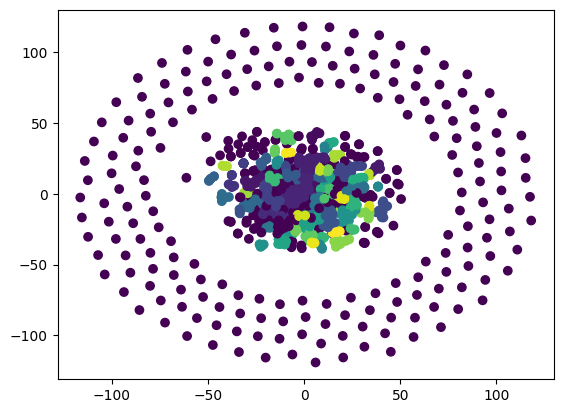

In [88]:
import matplotlib.pyplot as plt
plt.scatter(t_sne_weights[:, 0], t_sne_weights[:, 1],marker='o',c=y)
plt.show()

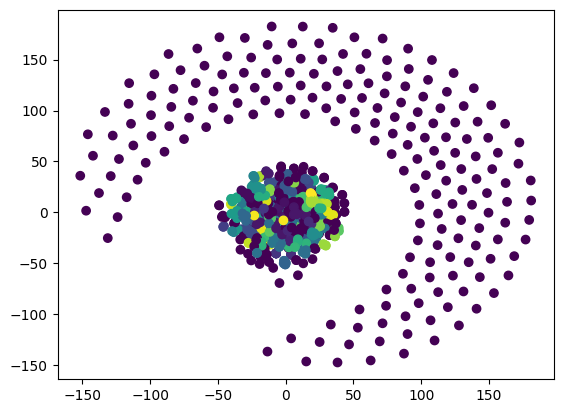

In [100]:
import matplotlib.pyplot as plt
plt.scatter(t_sne_weights[:, 0], t_sne_weights[:, 1],marker='o',c=y)
plt.show()

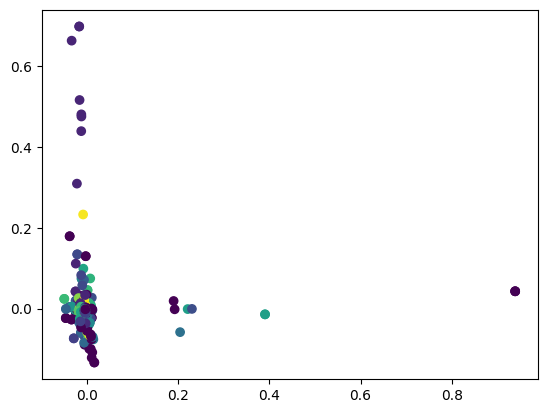

In [89]:
import matplotlib.pyplot as plt
plt.scatter(pca_weights[:, 0], pca_weights[:, 1],marker='o',c=y)
plt.show()

### Apply Algorithm - KMEANS

In [116]:
clf1 = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
              verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
y = clf1.fit_predict(tfidf.toarray())
print(y[:200])

result = {}
for text_idx, label_idx in enumerate(y):
      key = "cluster_{}".format(label_idx)
      if key not in result:
            result[key] = [text_idx]
      else:
            result[key].append(text_idx)
for clu_k, clu_v in result.items():
    print("\n","~"*170)
    print("number of poems in the cluster:"+str(len(clu_v)))
    print(clu_k)
    print(clu_v)
    
    for i in clu_v:
        print(text_list[i], "\n===============================>")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 7 0 0 0 0 0 0 0 0 0 7
 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 7 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 3 0 0 3 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 7 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 5 0 0 0 0
 0 0 0 0 0 0 0 2 0 2 0 0 6 0 0]

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number of poems in the cluster:936
cluster_0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105

In [117]:
from sklearn.cluster import MeanShift
clf2 = MeanShift(bandwidth=2)
y = clf2.fit_predict(tfidf.toarray())
print(y[:100])
result = {}
for text_idx, label_idx in enumerate(y):
      key = "cluster_{}".format(label_idx)
      if key not in result:
            result[key] = [text_idx]
      else:
            result[key].append(text_idx)
for clu_k, clu_v in result.items():
    print("\n","~"*170)
    print("number of poems in the cluster:"+str(len(clu_v)))
    print(clu_k)
    print(clu_v)
    
    for i in clu_v:
        print(text_list[i], "\n===============================>")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number of poems in the cluster:1000
cluster_0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 1

In [123]:
from sklearn.cluster import OPTICS
clf2 = OPTICS(min_samples=10, metric='minkowski', p=3, 
       metric_params=None, cluster_method='xi', eps=None, xi=0.05, 
       predecessor_correction=True, min_cluster_size=None, algorithm='auto', 
       leaf_size=30, memory=None, n_jobs=None)

y = clf2.fit_predict(t_sne_weights)
print(y[:100])
result = {}
for text_idx, label_idx in enumerate(y):
      key = "cluster_{}".format(label_idx)
      if key not in result:
            result[key] = [text_idx]
      else:
            result[key].append(text_idx)
for clu_k, clu_v in result.items():
    print("\n","~"*170)
    print("number of poems in the cluster:"+str(len(clu_v)))
    print(clu_k)
    print(clu_v)
    
    for i in clu_v:
        print(text_list[i], "\n===============================>")

[-1  3 -1 -1 -1  9  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8  4 -1
 -1 -1  2 -1 -1 -1 -1 -1  9 -1 -1 -1  2 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1
 -1  9 -1  3  7 -1 -1 -1 -1 -1 -1 -1  2  7  9 -1 -1  7  4 -1 -1  9 -1 -1
 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1
  9 -1 -1 -1]

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number of poems in the cluster:687
cluster_-1
[0, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50, 53, 54, 55, 56, 57, 58, 59, 63, 64, 67, 68, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 103, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,

/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [148]:
countVectorizer = CountVectorizer(analyzer="word")
count_v = countVectorizer.fit_transform(corpus3)
# print to see words in 
print(countVectorizer.get_feature_names_out())
# 词频向量
print(count_v.toarray())
print(count_v.shape)

ValueError: empty vocabulary; perhaps the documents only contain stop words